In [15]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle


In [87]:
road_data = pd.read_csv("./Datasets/severity/Road.csv")

In [88]:
road_data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [89]:
#create a sample dataset

test = road_data.drop(columns='Accident_severity')

In [90]:
test.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking


In [102]:
test = pd.read_csv("./Datasets/severity/sample/Road_test.csv")

def save_csv(data, filename):
    data.to_csv(f'./Datasets/severity/sample/{filename}.csv')




In [122]:
save_csv(test.iloc[[10]], 'Road_test_10')

In [101]:
test.to_csv('Road_test.csv', index=False)

In [33]:
road_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

Drop Columns 

In [34]:
columns_to_drop = ["Owner_of_vehicle",'Service_year_of_vehicle','Defect_of_vehicle','Lanes_or_Medians','Road_surface_type','Type_of_collision','Number_of_vehicles_involved','Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity','Work_of_casuality','Fitness_of_casuality','Cause_of_accident','Number_of_casualties','Types_of_Junction','Pedestrian_movement','Vehicle_movement']
road_data = road_data.drop(columns=columns_to_drop, axis=1)


In [86]:
road_data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Road_allignment,Road_surface_conditions,Light_conditions,Weather_conditions,Accident_severity
0,2,1,0,1,0,0,0,0,10,5,0,3,2,2
1,2,1,1,1,4,0,3,11,6,5,0,3,2,2
2,2,1,0,1,4,0,0,5,1,9,0,3,2,1
3,1,3,0,1,4,0,2,11,6,6,0,0,2,2
4,1,3,0,1,4,0,1,17,4,5,0,0,2,2


In [36]:
road_data.replace('Unknown', 'Over 51', inplace=True)


In [37]:
#checking the columns
road_data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Area_accident_occured', 'Road_allignment',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Accident_severity'],
      dtype='object')

In [85]:
test

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Road_allignment,Road_surface_conditions,Light_conditions,Weather_conditions
0,2,1,0,1,0,0,0,0,10,5,0,3,2
1,2,1,1,1,4,0,3,11,6,5,0,3,2
2,2,1,0,1,4,0,0,5,1,9,0,3,2
3,1,3,0,1,4,0,2,11,6,6,0,0,2
4,1,3,0,1,4,0,1,17,4,5,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,0,6,1,1,7,0,1,4,5,5,0,3,2
12312,2,3,2,1,1,0,2,0,5,0,0,3,2
12313,0,3,2,1,4,0,2,1,5,7,0,3,2
12314,0,3,0,0,4,0,3,5,6,7,0,0,2


Label Encoding

In [44]:
label_encoder = LabelEncoder()

In [38]:
road_data['Time'].value_counts()

15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
19:04:00      1
20:36:00      1
22:54:00      1
21:03:00      1
2:47:00       1
Name: Time, Length: 1074, dtype: int64

In [39]:
road_data['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [40]:
road_data['Time'] = pd.to_datetime(road_data['Time'], format='%H:%M:%S').dt.hour
road_data["Time"].value_counts()

17    1228
18     956
16     921
15     874
8      828
13     772
19     708
12     691
14     639
20     604
11     603
9      559
7      532
10     500
22     402
21     401
6      214
23     209
0      206
1      134
4       91
3       84
2       84
5       76
Name: Time, dtype: int64

In [41]:
bins = [0, 6, 12, 16, 19, 24]
labels = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
road_data['Time'] = pd.cut(road_data['Time'], bins=bins, labels=labels, include_lowest=True)

In [42]:
road_data["Time"].value_counts()

Morning          3713
Afternoon        3206
Evening          2892
Night            1616
Early Morning     889
Name: Time, dtype: int64

In [43]:
road_data['Time'] = label_encoder.fit_transform(road_data['Time'])
road_data["Time"].value_counts()

3    3713
0    3206
2    2892
4    1616
1     889
Name: Time, dtype: int64

In [45]:
road_data['Age_band_of_driver'] = road_data['Age_band_of_driver'].replace('Unknown', 'Over 51')

In [46]:
road_data["Age_band_of_driver"].value_counts()

18-30       4271
31-50       4087
Over 51     3133
Under 18     825
Name: Age_band_of_driver, dtype: int64

In [47]:
road_data['Age_band_of_driver'] = label_encoder.fit_transform(road_data['Age_band_of_driver'])
road_data["Age_band_of_driver"].value_counts()

0    4271
1    4087
2    3133
3     825
Name: Age_band_of_driver, dtype: int64

In [48]:

columns_to_encode = [ 'Sex_of_driver', 'Educational_level', 
                     'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 
                     'Area_accident_occured', 'Road_allignment', 'Road_surface_conditions', 
                     'Light_conditions', 'Weather_conditions', 'Day_of_week', 'Accident_severity']

label_encoder = LabelEncoder()
for column in columns_to_encode:
    road_data[column] = label_encoder.fit_transform(road_data[column])
    print(f"{column}: {road_data[column].value_counts()}")


Sex_of_driver: 1    11437
0      701
2      178
Name: Sex_of_driver, dtype: int64
Educational_level: 4    7619
1    2163
2    1110
7     741
0     362
6     176
5     100
3      45
Name: Educational_level, dtype: int64
Vehicle_driver_relation: 0    9627
3    1973
4     579
1     123
2      14
Name: Vehicle_driver_relation, dtype: int64
Driving_experience: 2    3363
1    2613
3    2262
0    1756
4    1342
7     829
5     118
6      33
Name: Driving_experience, dtype: int64
Type_of_vehicle: 0     3205
5     2186
7     1208
17     950
8      811
9      711
14     687
4      541
10     532
11     404
3      383
15     265
6      177
13      84
12      76
16      46
1       29
2       21
Name: Type_of_vehicle, dtype: int64
Area_accident_occured: 7     3819
6     3451
10    2060
2     1060
4      456
13     415
1      327
14     239
5      218
3      121
0       63
11      44
8       22
12      20
9        1
Name: Area_accident_occured, dtype: int64
Road_allignment: 5    10459
6      501
3  

In [49]:
road_data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Road_allignment,Road_surface_conditions,Light_conditions,Weather_conditions,Accident_severity
0,2,1,0,1,0,0,0,0,10,5,0,3,2,2
1,2,1,1,1,4,0,3,11,6,5,0,3,2,2
2,2,1,0,1,4,0,0,5,1,9,0,3,2,1
3,1,3,0,1,4,0,2,11,6,6,0,0,2,2
4,1,3,0,1,4,0,1,17,4,5,0,0,2,2


In [50]:
road_data.isnull().sum()

Time                       0
Day_of_week                0
Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Type_of_vehicle            0
Area_accident_occured      0
Road_allignment            0
Road_surface_conditions    0
Light_conditions           0
Weather_conditions         0
Accident_severity          0
dtype: int64

In [51]:
X = road_data.drop("Accident_severity",axis = 1)

In [52]:
X.shape

(12316, 13)

In [53]:
y = road_data["Accident_severity"]

In [56]:
y.value_counts()

2    10415
1     1743
0      158
Name: Accident_severity, dtype: int64

In [57]:
ros=RandomOverSampler(sampling_strategy='auto')
X_res,y_res=ros.fit_resample(X,y)

<AxesSubplot: ylabel='Accident_severity'>

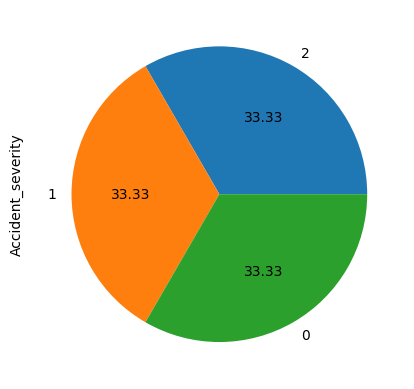

In [58]:
y_res.value_counts().plot.pie(autopct='%.2f')

Model Building

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42,stratify=y_res)

In [60]:
X_train.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Road_allignment,Road_surface_conditions,Light_conditions,Weather_conditions
26080,3,1,2,1,1,0,0,7,10,5,3,0,5
17647,2,0,1,1,4,0,0,0,1,5,0,3,2
6741,2,0,0,1,4,0,2,0,7,5,0,3,2
4872,0,3,3,1,4,3,3,14,7,5,0,3,2
29608,4,4,2,0,4,3,1,11,10,3,3,3,2


In [61]:
X_test.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Road_allignment,Road_surface_conditions,Light_conditions,Weather_conditions
11484,0,0,2,1,4,0,1,14,7,5,0,3,2
313,3,2,0,1,4,0,1,6,6,5,2,3,7
5162,3,1,0,1,4,0,4,3,6,5,3,3,5
8263,2,6,2,1,1,0,2,8,10,5,0,0,2
4283,0,0,2,1,1,0,2,5,7,5,0,3,2


In [62]:
pd.DataFrame(X_test).to_csv("./Datasets/severity/X_test.csv", index=False)

In [63]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24996, 13), (6249, 13), (24996,), (6249,))

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [67]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [72]:
y_pred_dt = decision_tree_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.9292686829892783

In [73]:
classification_report(y_test, y_pred_dt)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99      2083\n           1       0.84      0.99      0.91      2083\n           2       0.99      0.80      0.88      2083\n\n    accuracy                           0.93      6249\n   macro avg       0.94      0.93      0.93      6249\nweighted avg       0.94      0.93      0.93      6249\n'

In [68]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [69]:
y_pred_rf = rf_model.predict(X_test)

In [75]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9750360057609218

In [76]:
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00      2083\n           1       0.94      0.99      0.96      2083\n           2       0.99      0.94      0.96      2083\n\n    accuracy                           0.98      6249\n   macro avg       0.98      0.98      0.97      6249\nweighted avg       0.98      0.98      0.97      6249\n'

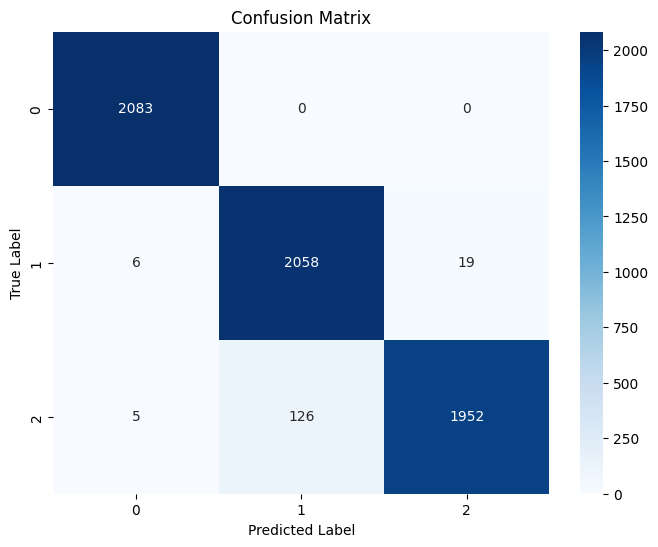

In [77]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

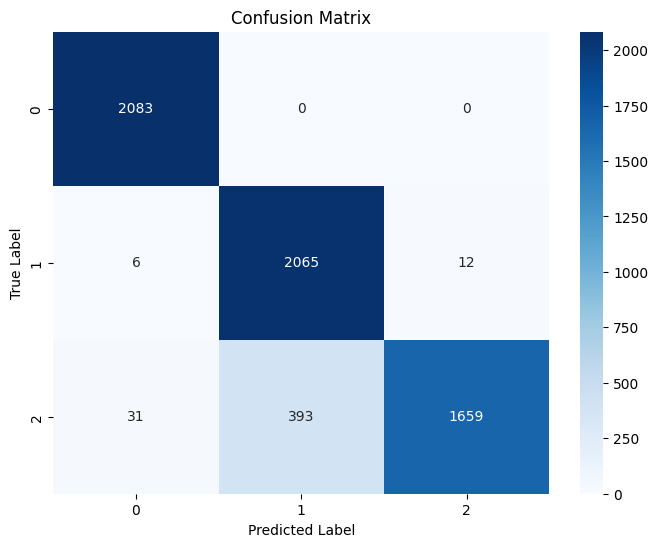

In [78]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [82]:
pickle.dump(rf_model, open('./accident_severity_model.pkl', 'wb'))

In [ ]:
for i in range(20):
    sample = data.head(i)
    sample.to_csv(f'./Datasets/place map/sample_test/sample{i}.csv')